In [52]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

Populating the interactive namespace from numpy and matplotlib


In [53]:
limit_rows = 5000000
df = pd.read_csv("C:\Users\student12\Desktop\Santander/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids = pd.Series(df['ncodpers'].unique())
limit_people = 1.2e4
unique_id = unique_ids.sample(n= limit_people)
df = df[df.ncodpers.isin(unique_id)]

In [54]:
df.age.describe()

count     71793
unique      206
top          23
freq       3478
Name: age, dtype: object

In [55]:
df.isnull().any()
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")

In [56]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [57]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

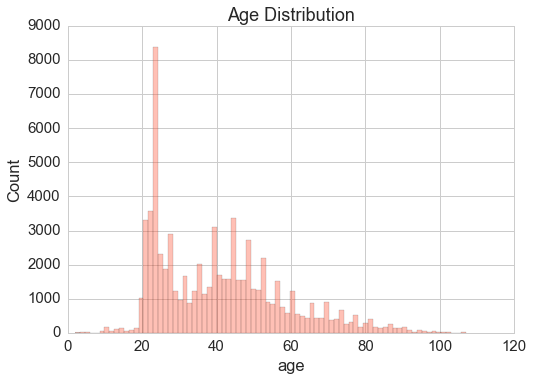

In [58]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [59]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True) #fills age outlier as average (for age < 18)
df.loc[df.age > 100,"age"] = df.loc[(df.age >= 30) & (df.age <= 100),"age"].mean(skipna=True) #fills age outlier as average (for age > 100)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"]                  = df["age"].astype(int)  

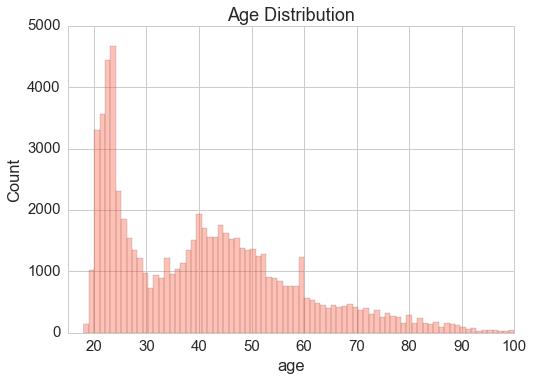

In [60]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

In [61]:
df['ind_nuevo'].isnull().sum()

341

In [62]:
months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size() #sorts how long the account is active for
months_active.max()

6

In [63]:
df.loc[df["ind_nuevo"].isnull(),"ind_nuevo"] = 1 #changes nulls into 1, meaning new customer

In [64]:
df.antiguedad = pd.to_numeric(df.antiguedad,errors="coerce")
np.sum(df["antiguedad"].isnull())

341

In [65]:
df.loc[df.antiguedad.isnull(),"antiguedad"] = df.antiguedad.min()
df.loc[df.antiguedad <0, "antiguedad"]      = 0 # Thanks @StephenSmith for bug-find

In [66]:
dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
df["fecha_alta"].describe()

count                   71793
unique                   4013
top       2014-10-03 00:00:00
freq                      413
first     1995-01-16 00:00:00
last      2015-08-31 00:00:00
Name: fecha_alta, dtype: object

In [67]:
df.indrel.value_counts()   #shows only a very small number of accounts are not primary

1.0     71350
99.0      102
Name: indrel, dtype: int64

In [68]:
df.indrel = df.indrel.fillna(1)

In [69]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [70]:
df.ind_actividad_cliente.value_counts()

1.0    36905
0.0    34547
Name: ind_actividad_cliente, dtype: int64

In [71]:
df.loc[df.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = df["ind_actividad_cliente"].median()

In [72]:
df.nomprov.unique() #notice issue with the first element, Coruna doesnt come out right
df.loc[df.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A" #and voila, here's the fix

In [73]:
df.renta.isnull().sum()

12723

In [74]:
#df.loc[df.renta.notnull(),:].groupby("nomprov").agg([{"Sum":sum},{"Mean":mean}])
incomes = df.loc[df.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in df.nomprov.unique()],ordered=False)
incomes.head()

,nomprov,renta
,,MedianIncome
0,CIUDAD REAL,57377.49
1,LERIDA,61050.27
2,LUGO,64358.25
3,JAEN,64946.04
4,BADAJOZ,65338.56


([<matplotlib.axis.YTick at 0x5ffc4fd0>,
 <a list of 4 Text yticklabel objects>)

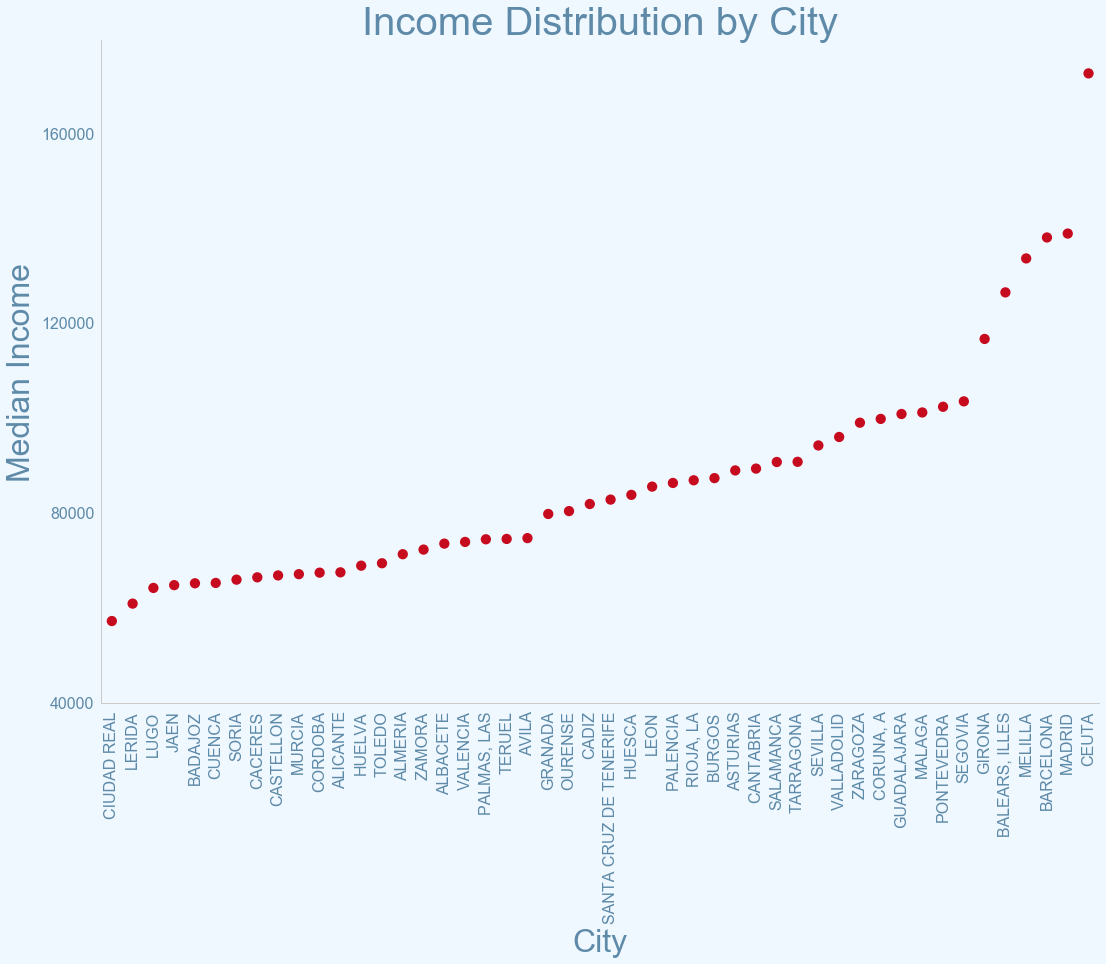

In [75]:
with sns.axes_style({
        "axes.facecolor":   "#f0f8ff",
        "axes.grid"     :    False,
        "figure.facecolor": "#f0f8ff"}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=10,
                   aspect=1.5,
                   scale=1.0,
                   color="#c60b1e",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=16,labelcolor="#5d8aa8")#
plt.ylabel("Median Income",size=32,color="#5d8aa8")
plt.xlabel("City",size=32,color="#5d8aa8")
plt.title("Income Distribution by City",size=40,color="#5d8aa8")
plt.ylim(40000,180000)
plt.yticks(range(40000,180000,40000))

In [76]:
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df             = df.reset_index()
new_incomes    = new_incomes.reset_index()

In [77]:
df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

In [78]:
df.renta.isnull().sum()

0

In [79]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [80]:
string_data = df.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data  #prints out the values in columns where there is text missing

Unique values for ind_empleado:
['N' 'F' 'A' 'B' nan]

Unique values for pais_residencia:
['ES' 'PT' 'RO' nan 'AR' 'AE' 'DO' 'IT' 'BE' 'CH' 'US' 'FR' 'DE' 'GB' 'EC'
 'VE' 'CO' 'UY' 'PE' 'BR' 'GR' 'CN' 'HU' 'BO']

Unique values for sexo:
['H' 'V' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-07' '2015-07-14' '2015-07-16' '2015-07-01' '2015-07-06'
 '2015-07-21' '2015-07-28' '2015-07-27' '2015-07-17' '2015-07-30'
 '2015-07-03' '2015-07-15' '2015-07-23' '2015-07-09' '2015-08-27'
 '2015-08-07' '2015-08-04' '2015-08-13' '2015-08-14' '2015-08-18'
 '2015-08-24']

Unique values for indrel_1mes:
[1.0 nan '1.0' '1' '3' '2.0' 3.0]

Unique values for tiprel_1mes:
['I' 'A' nan 'P']

Unique values for indresi:
['S' 'N' nan]

Unique values for indext:
['N' 'S' nan]

Unique values for conyuemp:
[nan 'N']

Unique values for canal_entrada:
['KHE' 'KEY' 'KFC' 'KAT' 'KFA' 'KAS' 'KBZ' 'KHL' 'KAF' 'KCI' 'KEJ' 'KCC'
 'KFD' 'KAA' 'KAM' 'KAW' 'KCH' '007' 'KHD' 'KAB' 'KAG' 'KAR' 'KAQ' 'KEN'
 'KHF' 'KAE' 

In [81]:
df.loc[df.indfall.isnull(),"indfall"] = "N"
df.loc[df.tiprel_1mes.isnull(),"tiprel_1mes"] = "A"
df.tiprel_1mes = df.tiprel_1mes.astype("category")

# As suggested by @StephenSmith
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

df.indrel_1mes.fillna("P",inplace=True)
df.indrel_1mes = df.indrel_1mes.apply(lambda x: map_dict.get(x,x))
df.indrel_1mes = df.indrel_1mes.astype("category")


unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    df.loc[df[col].isnull(),col] = "UNKNOWN"

In [82]:
df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
tipodom                   True
cod_prov                  True
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop

In [83]:
#remove tipodom and cod_prov since they are not very useful
df.drop(["tipodom","cod_prov"],axis=1,inplace=True)

In [84]:
df.isnull().any()
#data should be all  nice and clean now 

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco

In [85]:
feature_cols = df.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df[col] = df[col].astype(int)  #changes feature columns into integers (columns that will be used as features in the machine learning)

In [86]:
df.head()

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
52309,94560,2015-01-28,941040,N,ES,H,25,2011-09-12,0,46.0,...,0,0,0,0,0,0,0,0,0,0
34882,381365,2015-01-28,358867,N,ES,V,65,2002-05-13,0,158.0,...,0,0,0,0,0,0,0,0,0,0
54219,250758,2015-01-28,1175381,N,ES,V,21,2013-09-12,0,22.0,...,0,0,0,0,0,0,0,0,0,0
17351,243082,2015-01-28,1166382,N,ES,V,29,2013-08-14,0,23.0,...,0,0,0,0,0,0,0,0,0,0
17349,243515,2015-01-28,1163562,N,ES,V,22,2013-08-12,0,23.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df = df.ix[df['indfall'] == 'N'] #keeps only rows where clients are alive

In [88]:
df.indfall.value_counts()

N    71566
Name: indfall, dtype: int64

In [92]:
unique_months = pd.DataFrame(pd.Series(df.fecha_dato.unique()).sort_values()).reset_index(drop=True)
unique_months["month_id"] = pd.Series(range(1,1+unique_months.size)) # start with month 1, not 0 to match what we already have
unique_months["month_next_id"] = 1 + unique_months["month_id"]
unique_months.rename(columns={0:"fecha_dato"},inplace=True)
df = pd.merge(df,unique_months,on="fecha_dato")

In [93]:
df.head()

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month_id_x,month_next_id_x,month_id_y,month_next_id_y
0,94560,2015-01-28,941040,N,ES,H,25,2011-09-12,0,46.0,...,0,0,0,0,0,0,1,2,1,2
1,381365,2015-01-28,358867,N,ES,V,65,2002-05-13,0,158.0,...,0,0,0,0,0,0,1,2,1,2
2,250758,2015-01-28,1175381,N,ES,V,21,2013-09-12,0,22.0,...,0,0,0,0,0,0,1,2,1,2
3,243082,2015-01-28,1166382,N,ES,V,29,2013-08-14,0,23.0,...,0,0,0,0,0,0,1,2,1,2
4,243515,2015-01-28,1163562,N,ES,V,22,2013-08-12,0,23.0,...,0,0,0,0,0,0,1,2,1,2


In [94]:
def status_change(x):
    diffs = x.diff().fillna(0)# first occurrence will be considered Maintained, 
    #which is a little lazy. A better way would be to check if 
    #the earliest date was the same as the earliest we have in the dataset
    #and consider those separately. Entries with earliest dates later than that have 
    #joined and should be labeled as "Added"
    label = ["Added" if i==1 \
         else "Dropped" if i==-1 \
         else "Maintained" for i in diffs]
    return label

In [95]:
df.loc[:, feature_cols] = df.loc[:, [i for i in feature_cols]+["ncodpers"]].groupby("ncodpers").transform(status_change)

In [96]:
df = pd.melt(df, id_vars   = [col for col in df.columns if col not in feature_cols],
            value_vars= [col for col in feature_cols])
df = df.loc[df.value!="Maintained",:]
df.shape

(5984, 29)

In [97]:
df.head()

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,nomprov,ind_actividad_cliente,renta,segmento,month_id_x,month_next_id_x,month_id_y,month_next_id_y,variable,value
152111,886323,2015-02-28,399475,N,ES,V,41,2003-01-03,0,31.0,...,MADRID,1.0,215213.22,02 - PARTICULARES,2,3,2,3,ind_cco_fin_ult1,Added
152135,827986,2015-02-28,48017,N,ES,V,56,1996-10-28,0,225.0,...,MADRID,1.0,785647.41,01 - TOP,2,3,2,3,ind_cco_fin_ult1,Added
152177,813183,2015-02-28,174282,N,ES,V,54,2000-04-27,0,183.0,...,MADRID,1.0,101777.58,02 - PARTICULARES,2,3,2,3,ind_cco_fin_ult1,Dropped
152458,889618,2015-02-28,416119,N,ES,V,55,2003-04-22,0,41.0,...,MADRID,1.0,237036.09,02 - PARTICULARES,2,3,2,3,ind_cco_fin_ult1,Dropped
152675,947749,2015-02-28,1219627,N,ES,V,47,2013-11-14,0,20.0,...,SEVILLA,0.0,76402.80,02 - PARTICULARES,2,3,2,3,ind_cco_fin_ult1,Dropped


In [98]:
df.to_csv("C:\Users\student12\Desktop\Santander/clean_data_5M.csv")

In [99]:
df.head()

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,nomprov,ind_actividad_cliente,renta,segmento,month_id_x,month_next_id_x,month_id_y,month_next_id_y,variable,value
152111,886323,2015-02-28,399475,N,ES,V,41,2003-01-03,0,31.0,...,MADRID,1.0,215213.22,02 - PARTICULARES,2,3,2,3,ind_cco_fin_ult1,Added
152135,827986,2015-02-28,48017,N,ES,V,56,1996-10-28,0,225.0,...,MADRID,1.0,785647.41,01 - TOP,2,3,2,3,ind_cco_fin_ult1,Added
152177,813183,2015-02-28,174282,N,ES,V,54,2000-04-27,0,183.0,...,MADRID,1.0,101777.58,02 - PARTICULARES,2,3,2,3,ind_cco_fin_ult1,Dropped
152458,889618,2015-02-28,416119,N,ES,V,55,2003-04-22,0,41.0,...,MADRID,1.0,237036.09,02 - PARTICULARES,2,3,2,3,ind_cco_fin_ult1,Dropped
152675,947749,2015-02-28,1219627,N,ES,V,47,2013-11-14,0,20.0,...,SEVILLA,0.0,76402.80,02 - PARTICULARES,2,3,2,3,ind_cco_fin_ult1,Dropped
